In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorboard.plugins import projector
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend as K
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
import csv
import os

C:\Users\2000w\anaconda3\envs\tf_2_5\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
f = open("DIAMOND_I_battle_data.csv")
rdr = csv.reader(f)
r = list(rdr)
f.close()

In [91]:
sentence = []
label = []

for _r in r[1:]:
    _sentence = ""
    gamenum = _r[0]
    augments = []
    for ag in _r[1:4]:
        if "Augment" in ag:
            augments.append(ag)
    placement = _r[len(augments) + 1]
    champ_items = []
    for ci in _r[len(augments) + 2:]:
        if len(ci) > 0:
            champ_items.append(ci)
    champ_items = sorted(champ_items)
    
    for i in range(len(champ_items)):
        champ_items[i] = champ_items[i].replace('"', "").replace('[', "").replace("]", "").replace("'", "").replace(" ", "").split(",")
        champ_items[i] = champ_items[i][0:2] + sorted(champ_items[i][2:])
        _sentence += "-".join(champ_items[i][0:2]) + " "# + " ".join(champ_items[i][2:])

    for i in range(3):
        try:
            _sentence += augments[i] + " "
        except:
            _sentence += "noaugment" + " "
            pass

    sentence.append(_sentence)
    label.append(int(placement))
        
data = pd.DataFrame(zip(sentence, label), columns = ['sentence', 'label'])

In [98]:
print(data.iloc[0]['sentence'])
print(data.iloc[0]['label'])

TFT7_Bard-1 TFT7_Braum-2 TFT7_Diana-3 TFT7_Lillia-2 TFT7_Nunu-2 TFT7_Olaf-3 TFT7_Shen-2 TFT7_Yasuo-1 TFT6_Augment_PortableForge TFT6_Augment_Distancing TFT6_Augment_SunfireBoard 
3


In [93]:
tokenizer = Tokenizer(filters = '', lower = False)
tokenizer.fit_on_texts(data['sentence'])
word_dic = tokenizer.word_index
word_count = tokenizer.word_counts

# 중복 제거
#data = data.drop_duplicates(keep='first')

# 학습, 테스트 데이터 스플릿
x_data, y_data = data['sentence'], data['label']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

# 학습, 테스트 데이터 토큰화, 패딩
sequences = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
x_train_encoded = pad_sequences(sequences, maxlen = 16, padding = 'post')
x_test_encoded = pad_sequences(sequences_test, maxlen = 16, padding = 'post')
vocab_size = len(word_dic) + 1

In [94]:
if not os.path.exists('/model'):
    os.makedirs('/model')

# 모델 구축
model = Sequential()
embedding = model.add(Embedding(vocab_size, 10, input_length = 16))
model.add(LSTM(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = RMSprop(learning_rate = 0.001))
history = model.fit(x_train_encoded, y_train, epochs=10, batch_size=100, validation_split=0.2)
model.save('model/my_model.h5')

Epoch 1/10
263/263 [==============================] - 5s 8ms/step - loss: 5.1436 - val_loss: 2.4179
Epoch 2/10
263/263 [==============================] - 2s 7ms/step - loss: 2.5811 - val_loss: 2.1808
Epoch 3/10
263/263 [==============================] - 2s 7ms/step - loss: 2.2485 - val_loss: 2.2371
Epoch 4/10
263/263 [==============================] - 2s 7ms/step - loss: 2.0883 - val_loss: 1.9186
Epoch 5/10
263/263 [==============================] - 2s 7ms/step - loss: 2.0156 - val_loss: 2.0638
Epoch 6/10
263/263 [==============================] - 2s 7ms/step - loss: 1.9830 - val_loss: 1.9874
Epoch 7/10
263/263 [==============================] - 2s 7ms/step - loss: 1.9575 - val_loss: 2.1267
Epoch 8/10
263/263 [==============================] - 2s 7ms/step - loss: 1.9173 - val_loss: 1.9496
Epoch 9/10
263/263 [==============================] - 2s 7ms/step - loss: 1.9038 - val_loss: 2.0290
Epoch 10/10
263/263 [==============================] - 2s 7ms/step - loss: 1.8883 - val_loss: 1.8243

257/257 [==============================] - 1s 2ms/step


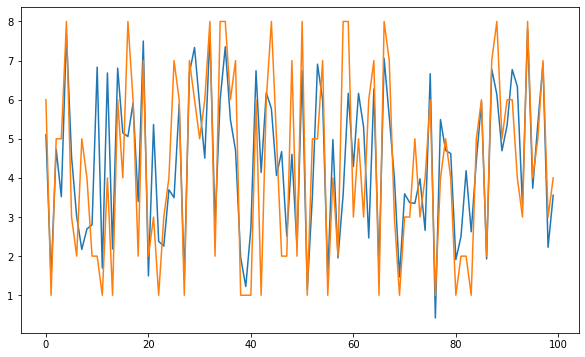

In [95]:
model.evaluate(x_test_encoded, y_test)
predict = model.predict(x_test_encoded)

x = np.arange(100)
plt.figure(figsize = (10, 6))
plt.plot(x, predict[:100])
plt.plot(x, y_test[:100])
plt.show()

In [107]:
x_input_data = ["TFT7_Bard-1 TFT7_Braum-2 TFT7_Diana-3 TFT7_Lillia-2 TFT7_Nunu-2 TFT7_Olaf-3 TFT7_Shen-2 TFT7_Yasuo-1 TFT6_Augment_PortableForge TFT6_Augment_Distancing TFT6_Augment_SunfireBoard"]
sequences_input = tokenizer.texts_to_sequences(x_input_data)
x_input_encoded = pad_sequences(sequences_input, maxlen = 16, padding = 'post')

predict_input = model.predict(x_input_encoded)
print(predict_input)

1/1 [==============================] - 0s 17ms/step
[[2.7490654]]
